In [1]:
import numpy as np
import pandas as pd
import os 

In [2]:
import matplotlib.pyplot as plt

In [3]:
import plotly.express as px
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Input,Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow import keras
from tensorflow.keras import layers

/Users/astroxjrk/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2023-03-09 19:46:46.965364: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


The structure of this file will be 96x7049 matrix with total 96.
hight = 96 , width = 96, color = 7049 layer of images

In [4]:
np.load("/Users/astroxjrk/Desktop/Dataset/face_images/face_images.npz")['face_images'].shape

(96, 96, 7049)

Now we move axes of an array to new positions.

In [5]:
PicFace = np.moveaxis(np.load('/Users/astroxjrk/Desktop/Dataset/face_images/face_images.npz')['face_images'],-1,0)
print(PicFace.shape)

(7049, 96, 96)


In [6]:
KP = pd.read_csv('/Users/astroxjrk/Desktop/Dataset/face_images/facial_keypoints.csv')
print("Number of null")
print(KP.isnull().sum())

Number of null
left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33

In [7]:
KP.head()

left_eye_center_x  left_eye_center_y  right_eye_center_x  \
0          66.033564          39.002274           30.227008   
1          64.332936          34.970077           29.949277   
2          65.057053          34.909642           30.903789   
3          65.225739          37.261774           32.023096   
4          66.725301          39.621261           32.244810   

   right_eye_center_y  left_eye_inner_corner_x  left_eye_inner_corner_y  \
0           36.421678                59.582075                39.647423   
1           33.448715                58.856170                35.274349   
2           34.909642                59.412000                36.320968   
3           37.261774                60.003339                39.127179   
4           38.042032                58.565890                39.621261   

   left_eye_outer_corner_x  left_eye_outer_corner_y  right_eye_inner_corner_x  \
0                73.130346                39.969997                 36.356571   
1                70.722723                36.187166                 36.034723   
2                70.984421                36.320968                 37.678105   
3                72.314713                38.380967                 37.618643   
4                72.515926                39.884466                 36.982380   

   right_eye_inner_corner_y  ...  nose_tip_x  nose_tip_y  mouth_left_corner_x  \
0                 37.389402  ...   44.420571   57.066803            61.195308   
1                 34.361532  ...   48.206298   55.660936            56.421447   
2                 36.320968  ...   47.557263   53.538947            60.822947   
3                 38.754115  ...   51.885078   54.166539            65.598887   
4                 39.094852  ...   43.299534   64.889521            60.671411   

   mouth_left_corner_y  mouth_right_corner_x  mouth_right_corner_y  \
0            79.970165             28.614496             77.388992   
1            76.352000             35.122383             76.047660   
2            73.014316             33.726316             72.732000   
3            72.703722             37.245496             74.195478   
4            77.523239             31.191755             76.997301   

   mouth_center_top_lip_x  mouth_center_top_lip_y  mouth_center_bottom_lip_x  \
0               43.312602               72.935459                  43.130707   
1               46.684596               70.266553                  45.467915   
2               47.274947               70.191789                  47.274947   
3               50.303165               70.091687                  51.561183   
4               44.962748               73.707387                  44.227141   

   mouth_center_bottom_lip_y  
0                  84.485774  
1                  85.480170  
2                  78.659368  
3                  78.268383  
4                  86.871166  

[5 rows x 30 columns]

All images have 4 key points

In [8]:
Frac_KP = (KP.iloc[:,0::2].isnull().mean(0))*100
print(100-Frac_KP)

left_eye_center_x             99.858136
right_eye_center_x            99.815577
left_eye_inner_corner_x       32.217336
left_eye_outer_corner_x       32.160590
right_eye_inner_corner_x      32.174777
right_eye_outer_corner_x      32.174777
left_eyebrow_inner_end_x      32.203149
left_eyebrow_outer_end_x      31.564761
right_eyebrow_inner_end_x     32.203149
right_eyebrow_outer_end_x     31.720811
nose_tip_x                   100.000000
mouth_left_corner_x           32.188963
mouth_right_corner_x          32.203149
mouth_center_top_lip_x        32.274081
mouth_center_bottom_lip_x     99.531848
dtype: float64


Cleaning Data

    1.Cleaning data by replaceing with median number every columns that contained a N.A.

In [9]:
KP_Med = KP.fillna(KP.median())
KP_Med.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          7049 non-null   float64
 1   left_eye_center_y          7049 non-null   float64
 2   right_eye_center_x         7049 non-null   float64
 3   right_eye_center_y         7049 non-null   float64
 4   left_eye_inner_corner_x    7049 non-null   float64
 5   left_eye_inner_corner_y    7049 non-null   float64
 6   left_eye_outer_corner_x    7049 non-null   float64
 7   left_eye_outer_corner_y    7049 non-null   float64
 8   right_eye_inner_corner_x   7049 non-null   float64
 9   right_eye_inner_corner_y   7049 non-null   float64
 10  right_eye_outer_corner_x   7049 non-null   float64
 11  right_eye_outer_corner_y   7049 non-null   float64
 12  left_eyebrow_inner_end_x   7049 non-null   float64
 13  left_eyebrow_inner_end_y   7049 non-null   float

2.Cleaning data by droping every columns that contained a N.A.

In [10]:
KP_Drop = KP.dropna()
KP_Drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140 entries, 0 to 2283
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          2140 non-null   float64
 1   left_eye_center_y          2140 non-null   float64
 2   right_eye_center_x         2140 non-null   float64
 3   right_eye_center_y         2140 non-null   float64
 4   left_eye_inner_corner_x    2140 non-null   float64
 5   left_eye_inner_corner_y    2140 non-null   float64
 6   left_eye_outer_corner_x    2140 non-null   float64
 7   left_eye_outer_corner_y    2140 non-null   float64
 8   right_eye_inner_corner_x   2140 non-null   float64
 9   right_eye_inner_corner_y   2140 non-null   float64
 10  right_eye_outer_corner_x   2140 non-null   float64
 11  right_eye_outer_corner_y   2140 non-null   float64
 12  left_eyebrow_inner_end_x   2140 non-null   float64
 13  left_eyebrow_inner_end_y   2140 non-null   float

In [11]:
idex_Med = KP_Med.index.tolist() 
idex_Drop = KP_Drop.index.tolist() 

PicFace_mod_Med = PicFace[idex_Med]
PicFace_mod_Drop = PicFace[idex_Drop]
print(PicFace_mod_Med.shape)
print(PicFace_mod_Drop.shape)

(7049, 96, 96)
(2140, 96, 96)


Pixel value range will be 0 to 256 which is 255 number.So,the computation of high numeric values may become more complex.To reduce this we can normalize the values to range from 0 to 1.

Data with 2 method are totall 7049 samples and 30 key positon of face.

In [12]:
Spic=PicFace.shape[1]

Img_Drop = PicFace_mod_Drop/255
Img_Med = PicFace_mod_Med/255

Val_Drop = KP_Drop.values/Spic
print(Val_Drop.shape,"For data with drop na.")
Val_Med = KP_Med.values/Spic
print(Val_Med.shape,"For data with replace Median")

print(Spic)

(2140, 30) For data with drop na.
(7049, 30) For data with replace Median
96


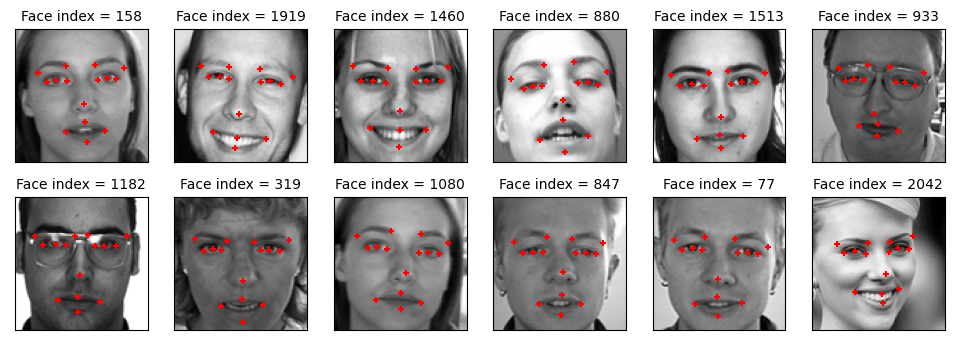

In [13]:
n = 0
nrows = 2
ncols = 6
fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True,figsize=[ncols*2,nrows*2])
rand=np.random.choice(Val_Drop.shape[0],nrows*ncols)

for row in range(nrows):
    for col in range(ncols):
        ax[row,col].set_title('Face index = %d' %(rand[n]),fontsize=10)          
        ax[row,col].imshow(Img_Drop[rand[n]], cmap='gray') 
        ax[row,col].scatter(Val_Drop[rand[n],0::2]*Spic,Val_Drop[rand[n],1::2]*Spic,marker='+',c='red',s=15)
        ax[row,col].set_xticks(())
        ax[row,col].set_yticks(())
        n += 1

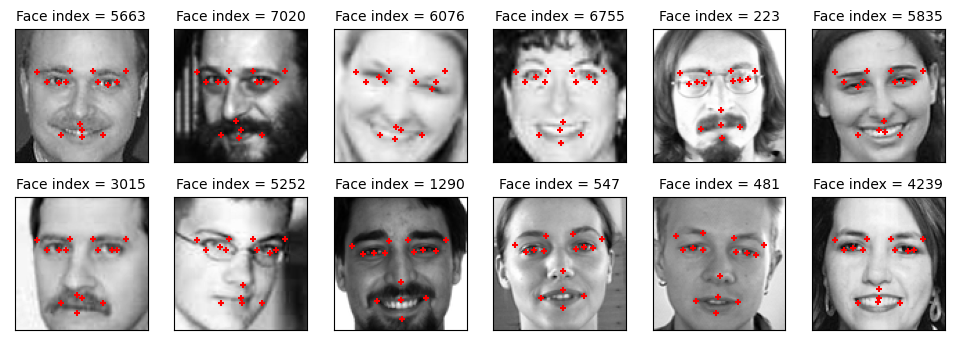

In [14]:
n = 0
nrows = 2
ncols = 6
fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True,figsize=[ncols*2,nrows*2])
rand=np.random.choice(Val_Med.shape[0],nrows*ncols)

for row in range(nrows):
    for col in range(ncols):
        ax[row,col].set_title('Face index = %d' %(rand[n]),fontsize=10)          
        ax[row,col].imshow(Img_Med[rand[n]], cmap='gray') 
        ax[row,col].scatter(Val_Med[rand[n],0::2]*Spic,Val_Med[rand[n],1::2]*Spic,marker='+',c='red',s=15)
        ax[row,col].set_xticks(())
        ax[row,col].set_yticks(())
        n += 1

Method by CNN 

split original data to Test 20% and train 80% (this is common when we use supervised learning)

In [15]:
# To Split the dataset

randomSeed =21
Img_Med_train, Img_Med_test, Val_Med_train, Val_Med_test = train_test_split(Img_Med, Val_Med, test_size=0.2, random_state=randomSeed)
Img_Drop_train, Img_Drop_test, Val_Drop_train, Val_Drop_test = train_test_split(Img_Drop, Val_Drop, test_size=0.2, random_state=randomSeed)

2.1.1 CNN standard to solve problem (Median)

In [16]:
model_Med = Sequential()

model_Med.add(Conv2D(32, (3, 3), padding = 'same', activation='relu',input_shape=(96,96,1)))
model_Med.add(MaxPool2D(pool_size=(2, 2)))
model_Med.add(Conv2D(64, (3, 3), padding = 'same', activation='relu'))
model_Med.add(MaxPool2D(pool_size=(2, 2)))
model_Med.add(Conv2D(128, (3, 3), padding = 'same', activation='relu'))
model_Med.add(MaxPool2D(pool_size=(2, 2)))
model_Med.add(Dropout(0.5))
model_Med.add(Flatten())
model_Med.add(Dense(100, activation='relu'))
model_Med.add(Dense(30, activation='sigmoid'))

adam = keras.optimizers.Adam(learning_rate=0.001)

# compare x test and x train
model_Med.compile(loss='mean_squared_error', optimizer=adam, metrics=['mean_squared_error','acc'])

history_Med = model_Med.fit(Img_Med_train, 
          Val_Med_train, 
          batch_size=62, 
          epochs=5, 
          validation_data = (Img_Med_test, Val_Med_test), 
          verbose = 1)


2023-03-09 19:47:01.834034: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/5
91/91 [==============================] - 65s 694ms/step - loss: 0.0022 - mean_squared_error: 0.0022 - acc: 0.5253 - val_loss: 8.4245e-04 - val_mean_squared_error: 8.4245e-04 - val_acc: 0.5801
Epoch 2/5
91/91 [==============================] - 75s 828ms/step - loss: 8.0499e-04 - mean_squared_error: 8.0499e-04 - acc: 0.5779 - val_loss: 7.4960e-04 - val_mean_squared_error: 7.4960e-04 - val_acc: 0.5993
Epoch 3/5
91/91 [==============================] - 69s 756ms/step - loss: 7.1790e-04 - mean_squared_error: 7.1790e-04 - acc: 0.6109 - val_loss: 6.8075e-04 - val_mean_squared_error: 6.8075e-04 - val_acc: 0.6567
Epoch 4/5
91/91 [==============================] - 83s 919ms/step - loss: 6.6087e-04 - mean_squared_error: 6.6087e-04 - acc: 0.6443 - val_loss: 6.2234e-04 - val_mean_squared_error: 6.2234e-04 - val_acc: 0.6199
Epoch 5/5
91/91 [==============================] - 93s 1s/step - loss: 6.0770e-04 - mean_squared_error: 6.0770e-04 - acc: 0.6829 - val_loss: 6.0784e-04 - val_mean_squar

In [17]:
model_Med.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 128)      0

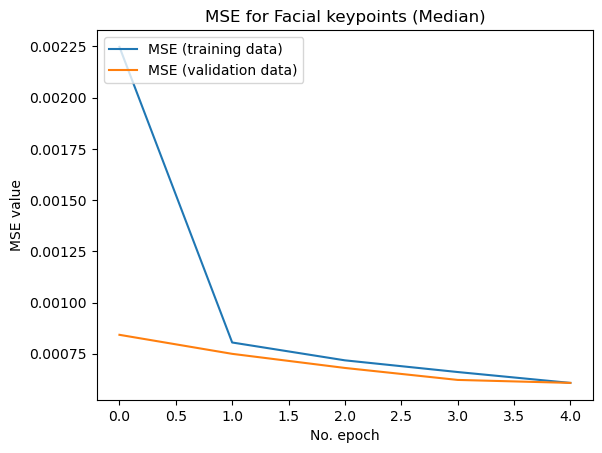

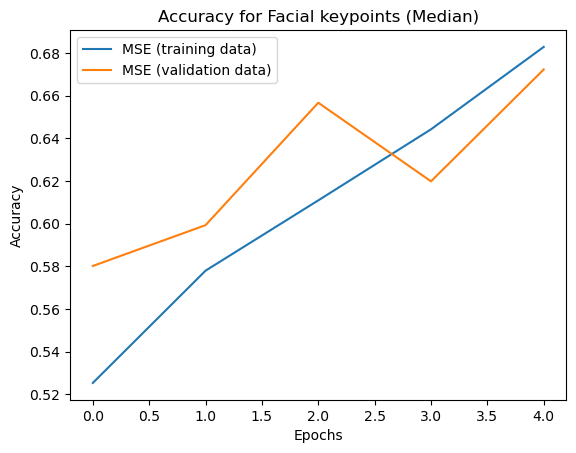

In [18]:
# The result for Loss
plt.plot(history_Med.history['mean_squared_error'], label='MSE (training data)')
plt.plot(history_Med.history['val_mean_squared_error'], label='MSE (validation data)')
plt.title('MSE for Facial keypoints (Median)')
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

# The result of accuracy 
plt.plot(history_Med.history['acc'], label='MSE (training data)') 
plt.plot(history_Med.history['val_acc'], label='MSE (validation data)')
plt.title('Accuracy for Facial keypoints (Median)')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc="upper left")
plt.show()

2.1.2 CNN standard to solve problem (Drop)

In [19]:
model_Drop = Sequential()

model_Drop.add(Conv2D(32, (3, 3), padding = 'same', activation='relu',input_shape=(96,96,1)))
model_Drop.add(MaxPool2D(pool_size=(2, 2)))
model_Drop.add(Conv2D(64, (3, 3), padding = 'same', activation='relu'))
model_Drop.add(MaxPool2D(pool_size=(2, 2)))
model_Drop.add(Conv2D(128, (3, 3), padding = 'same', activation='relu'))
model_Drop.add(MaxPool2D(pool_size=(2, 2)))
model_Drop.add(Dropout(0.5))
model_Drop.add(Flatten())
model_Drop.add(Dense(100, activation='relu'))
model_Drop.add(Dense(30, activation='sigmoid'))

adam = keras.optimizers.Adam(learning_rate=0.001)

# compare x test and x train
model_Drop.compile(loss='mean_squared_error', optimizer=adam, metrics=['mean_squared_error','acc'])

history_Drop = model_Drop.fit(Img_Drop_train, 
         Val_Drop_train, 
         batch_size=32, 
         epochs=5, 
         validation_data = (Img_Drop_test, Val_Drop_test), 
        verbose = 1)


Epoch 1/5
54/54 [==============================] - 26s 443ms/step - loss: 0.0035 - mean_squared_error: 0.0035 - acc: 0.6647 - val_loss: 0.0012 - val_mean_squared_error: 0.0012 - val_acc: 0.6893
Epoch 2/5
54/54 [==============================] - 25s 470ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - acc: 0.7091 - val_loss: 0.0010 - val_mean_squared_error: 0.0010 - val_acc: 0.6893
Epoch 3/5
54/54 [==============================] - 26s 464ms/step - loss: 9.7227e-04 - mean_squared_error: 9.7227e-04 - acc: 0.7091 - val_loss: 8.3494e-04 - val_mean_squared_error: 8.3494e-04 - val_acc: 0.6916
Epoch 4/5
54/54 [==============================] - 22s 412ms/step - loss: 7.5986e-04 - mean_squared_error: 7.5986e-04 - acc: 0.7068 - val_loss: 6.6975e-04 - val_mean_squared_error: 6.6975e-04 - val_acc: 0.6893
Epoch 5/5
54/54 [==============================] - 22s 415ms/step - loss: 6.1784e-04 - mean_squared_error: 6.1784e-04 - acc: 0.7155 - val_loss: 5.7450e-04 - val_mean_squared_error: 5.7450e-04 

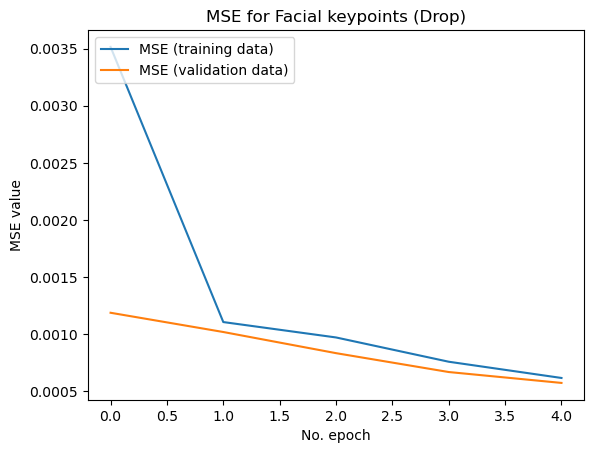

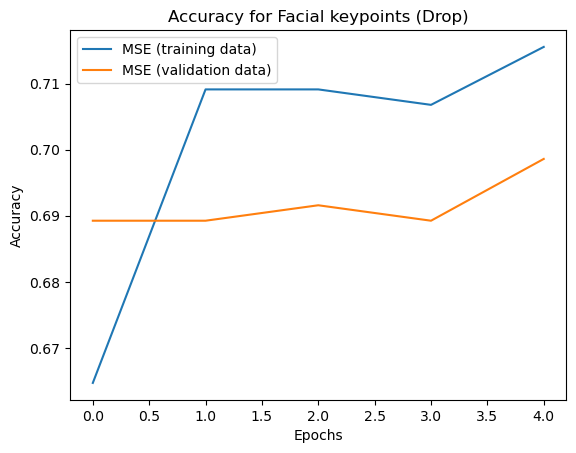

In [20]:
# The result for Loss
plt.plot(history_Drop.history['mean_squared_error'], label='MSE (training data)')
plt.plot(history_Drop.history['val_mean_squared_error'], label='MSE (validation data)')
plt.title('MSE for Facial keypoints (Drop)')
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

# The result of accuracy 
plt.plot(history_Drop.history['acc'], label='MSE (training data)') 
plt.plot(history_Drop.history['val_acc'], label='MSE (validation data)')
plt.title('Accuracy for Facial keypoints (Drop)')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc="upper left")
plt.show()

In [21]:
model_Drop.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 96, 96, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 12, 12, 128)     

2.2 VGGNet to solve problem

In [22]:
model_VGGNet = Sequential()

model_VGGNet.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(96,96,1)))
model_VGGNet.add(Conv2D(64, (3, 3), activation='relu',padding="same"))
model_VGGNet.add(MaxPool2D(pool_size=(2, 2)))
model_VGGNet.add(Conv2D(128, (3, 3), activation='relu', padding="same"))
model_VGGNet.add(Conv2D(128, (3, 3), activation='relu', padding="same"))
model_VGGNet.add(MaxPool2D(pool_size=(2, 2)))
model_VGGNet.add(Conv2D(256, (3, 3), activation='relu', padding="same"))
model_VGGNet.add(Conv2D(256, (3, 3), activation='relu', padding="same"))
model_VGGNet.add(Conv2D(256, (3, 3), activation='relu', padding="same"))
model_VGGNet.add(MaxPool2D(pool_size=(2, 2)))
model_VGGNet.add(Conv2D(512, (3, 3), activation='relu', padding="same"))
model_VGGNet.add(Conv2D(512, (3, 3), activation='relu', padding="same"))
model_VGGNet.add(Conv2D(512, (3, 3), activation='relu', padding="same"))
model_VGGNet.add(MaxPool2D(pool_size=(2, 2)))
model_VGGNet.add(Conv2D(512, (3, 3), activation='relu', padding="same"))
model_VGGNet.add(Conv2D(512, (3, 3), activation='relu', padding="same"))
model_VGGNet.add(Conv2D(512, (3, 3), activation='relu', padding="same"))
model_VGGNet.add(MaxPool2D(pool_size=(2, 2)))
model_VGGNet.add(Flatten())
model_VGGNet.add(Dense(4096, activation='relu'))
model_VGGNet.add(Dense(4096, activation='relu'))
model_VGGNet.add(Dense(30, activation='softmax'))

adam = keras.optimizers.Adam(learning_rate=0.001)

model_VGGNet.compile(loss='mean_squared_error', optimizer=adam, metrics=['mean_squared_error','acc'])

history_VGG = model_VGGNet.fit(Img_Drop_train, 
          Val_Drop_train, 
          batch_size=128, 
          epochs=5, 
          validation_data = (Img_Drop_test, Val_Drop_test), 
          verbose = 1)

Epoch 1/5
14/14 [==============================] - 495s 36s/step - loss: 0.2480 - mean_squared_error: 0.2480 - acc: 0.2897 - val_loss: 0.2403 - val_mean_squared_error: 0.2403 - val_acc: 0.0374
Epoch 2/5
14/14 [==============================] - 464s 33s/step - loss: 0.2397 - mean_squared_error: 0.2397 - acc: 0.1396 - val_loss: 0.2385 - val_mean_squared_error: 0.2385 - val_acc: 0.2593
Epoch 3/5
14/14 [==============================] - 401s 28s/step - loss: 0.2388 - mean_squared_error: 0.2388 - acc: 0.1116 - val_loss: 0.2383 - val_mean_squared_error: 0.2383 - val_acc: 0.2593
Epoch 4/5
14/14 [==============================] - 485s 35s/step - loss: 0.2386 - mean_squared_error: 0.2386 - acc: 0.2488 - val_loss: 0.2382 - val_mean_squared_error: 0.2382 - val_acc: 0.2593
Epoch 5/5
14/14 [==============================] - 479s 33s/step - loss: 0.2384 - mean_squared_error: 0.2384 - acc: 0.2488 - val_loss: 0.2376 - val_mean_squared_error: 0.2376 - val_acc: 0.2593


In [23]:
model_VGGNet.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 96, 96, 64)        640       
                                                                 
 conv2d_7 (Conv2D)           (None, 96, 96, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 48, 48, 128)       73856     
                                                                 
 conv2d_9 (Conv2D)           (None, 48, 48, 128)       147584    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 24, 24, 128)      0         
 2D)                                                  

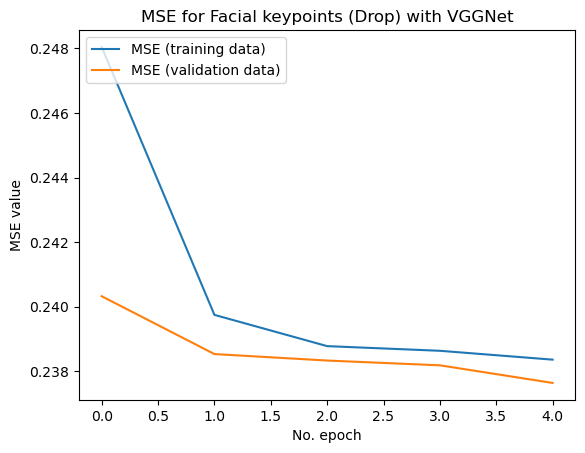

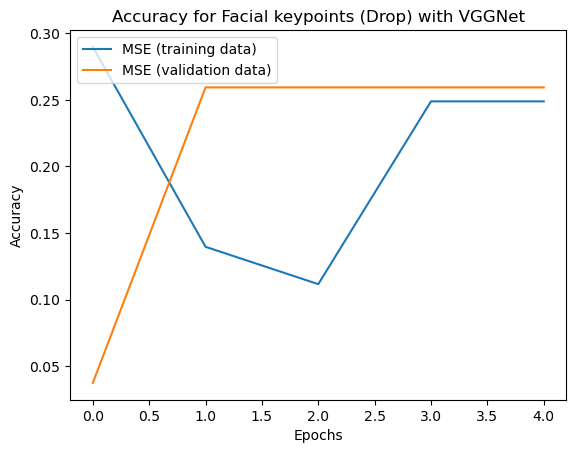

In [24]:
# The result for Loss
plt.plot(history_VGG.history['mean_squared_error'], label='MSE (training data)')
plt.plot(history_VGG.history['val_mean_squared_error'], label='MSE (validation data)')
plt.title('MSE for Facial keypoints (Drop) with VGGNet')
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

# The result of accuracy 
plt.plot(history_VGG.history['acc'], label='MSE (training data)') 
plt.plot(history_VGG.history['val_acc'], label='MSE (validation data)')
plt.title('Accuracy for Facial keypoints (Drop) with VGGNet')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc="upper left")
plt.show()

3.Ploting training data to images 

45/45 [==============================] - 4s 92ms/step


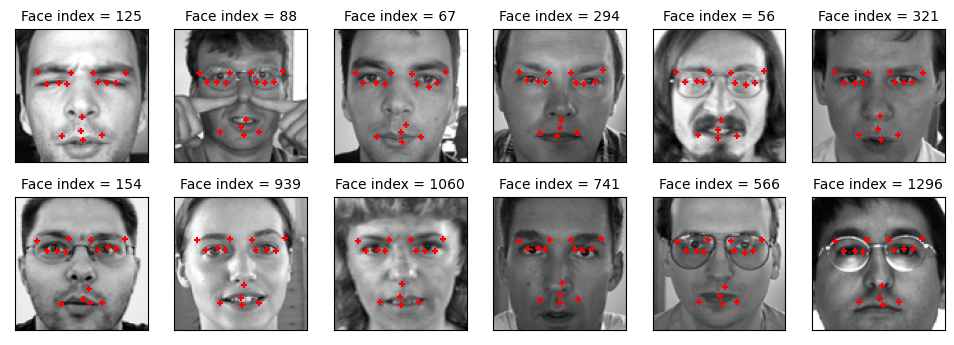

In [25]:
Val_Med_train_Pred = model_Med.predict(Img_Med_train)
Val_Med_test_Pred = model_Med.predict(Img_Med_test)

n = 0
nrows = 2
ncols = 6
fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True,figsize=[ncols*2,nrows*2])
rand=np.random.choice(Val_Med_test.shape[0],nrows*ncols)

for row in range(nrows):
    for col in range(ncols):
        ax[row,col].set_title('Face index = %d' %(rand[n]),fontsize=10)
        ax[row,col].imshow(Img_Med[rand[n]], cmap='gray')
        ax[row,col].scatter(Val_Med_test_Pred[rand[n],0::2]*Spic,Val_Med_test_Pred[rand[n],1::2]*Spic,marker='+',c='red',s=15)
        ax[row,col].set_xticks(())
        ax[row,col].set_yticks(())
        n += 1

14/14 [==============================] - 1s 102ms/step


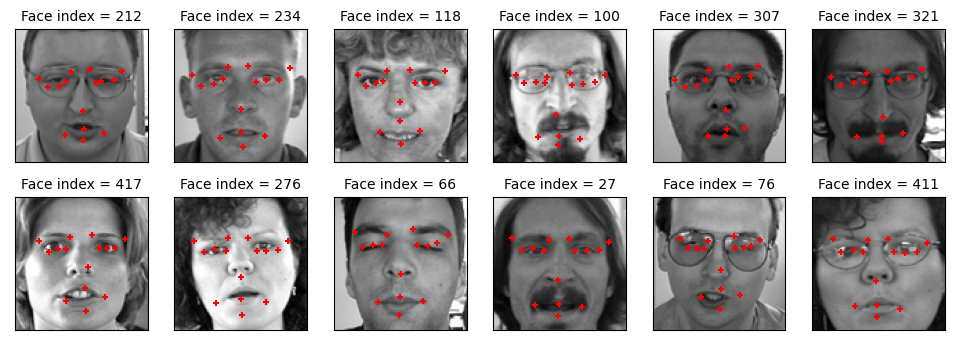

In [26]:
Val_Drop_train_Pred = model_Drop.predict(Img_Drop_train)
Val_Drop_test_Pred = model_Drop.predict(Img_Drop_test)

n = 0
nrows = 2
ncols = 6
fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True,figsize=[ncols*2,nrows*2])
rand=np.random.choice(Val_Drop_test.shape[0],nrows*ncols)

for row in range(nrows):
    for col in range(ncols):
        ax[row,col].set_title('Face index = %d' %(rand[n]),fontsize=10)
        ax[row,col].imshow(Img_Drop[rand[n]], cmap='gray')
        ax[row,col].scatter(Val_Drop_test_Pred[rand[n],0::2]*Spic,Val_Drop_test_Pred[rand[n],1::2]*Spic,marker='+',c='red',s=15)
        ax[row,col].set_xticks(())
        ax[row,col].set_yticks(())
        n += 1